In [1]:
from env import BSEnv

from trainingenv import TrainingBSEnv
from agents.tabular_q_learning_agent import TabularQLearningAgent

import game_metrics as gm
from IPython.display import display, clear_output

import matplotlib.pyplot as plt

from copy import deepcopy

In [2]:
tab_q_learning_args = {
    "num_decks": 1,
    "ep_decay": 1000,
    "ep_start": 0.9,
    "ep_end": 0.1,
    "train_every" : 50,
    "learning_rate": 0.01,
    "required_confidence": 0.95
}

env = TrainingBSEnv(
    [TabularQLearningAgent, TabularQLearningAgent, TabularQLearningAgent, TabularQLearningAgent],
    agent_args=[
        tab_q_learning_args,
        tab_q_learning_args,
        tab_q_learning_args,
        tab_q_learning_args
    ],
)

In [3]:
%matplotlib inline

total_results = []

plt.ion()

def render_graphs():
    plt.close("all")
    gm.plt_avg_delta_cards(total_results, 0)
    gm.plt_avg_delta_cards(total_results, 1)
    gm.plt_avg_delta_cards(total_results, 2)
    gm.plt_avg_delta_cards(total_results, 3)
    gm.plt_win_rate(total_results, 0)
    gm.plt_win_rate(total_results, 1)
    gm.plt_win_rate(total_results, 2)
    gm.plt_win_rate(total_results, 3)
    gm.plt_bs_called_accuracy_not_free(total_results, 0)
    gm.plt_bs_called_accuracy_not_free(total_results, 1)
    gm.plt_bs_called_accuracy_not_free(total_results, 2)
    gm.plt_bs_called_accuracy_not_free(total_results, 3)
    gm.plt_bs_accuracy(total_results, 0)
    gm.plt_bs_accuracy(total_results, 1)
    gm.plt_bs_accuracy(total_results, 2)
    gm.plt_bs_accuracy(total_results, 3)
    gm.plt_bs_call_rate(total_results, 0)
    gm.plt_bs_call_rate(total_results, 1)
    gm.plt_bs_call_rate(total_results, 2)
    gm.plt_bs_call_rate(total_results, 3)
    gm.plt_true_bs_ratio(total_results, player_indexes=[0,1,2,3])
    gm.plt_duration(total_results)

[0, 2, 1, 97]
Killing player 0 and replacing with player 3
Episode: 500


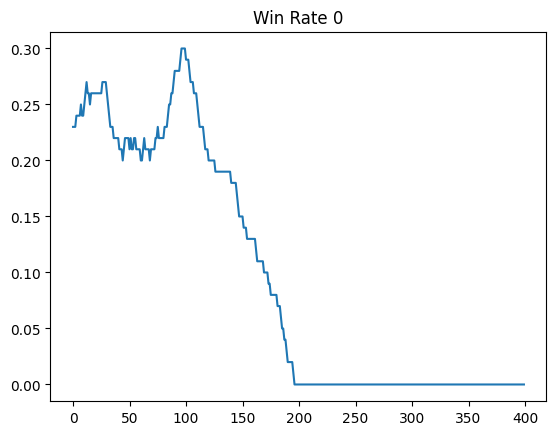

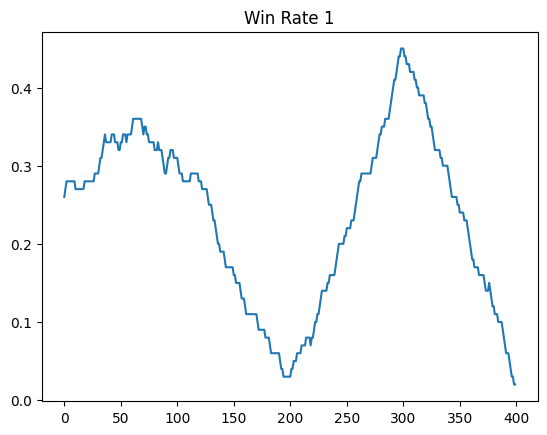

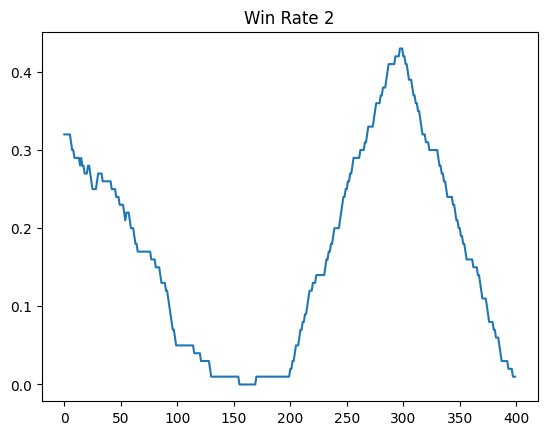

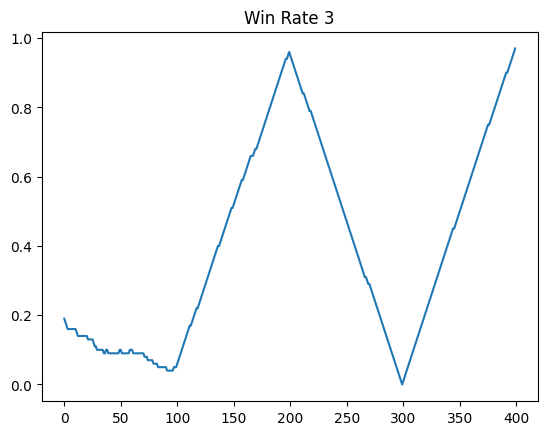

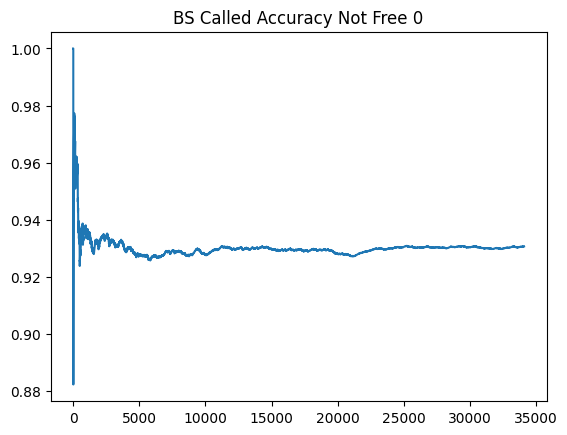

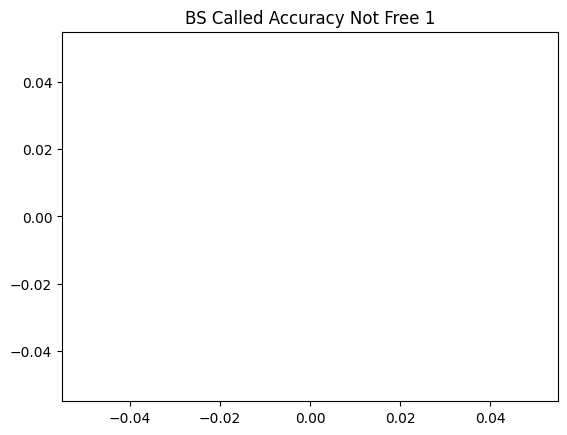

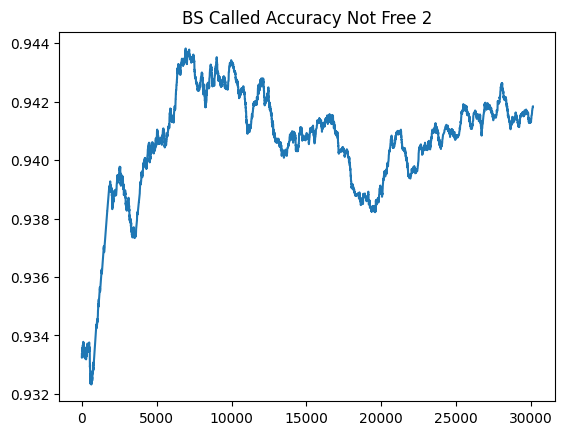

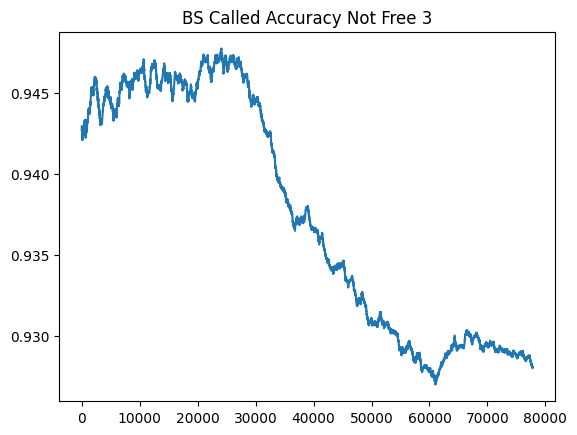

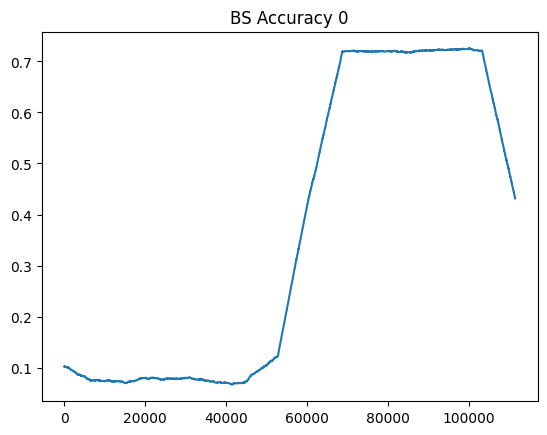

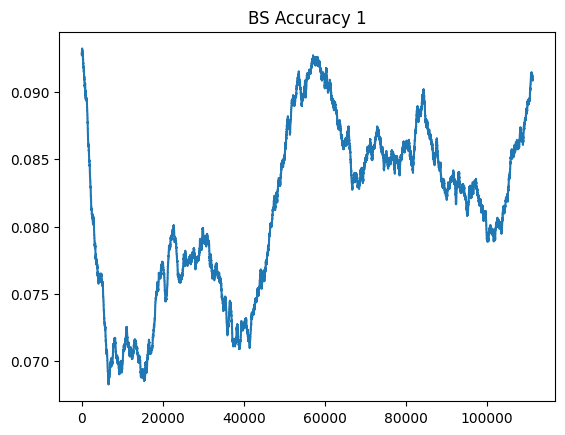

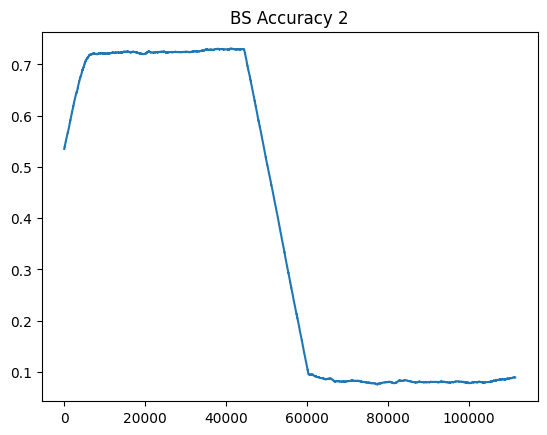

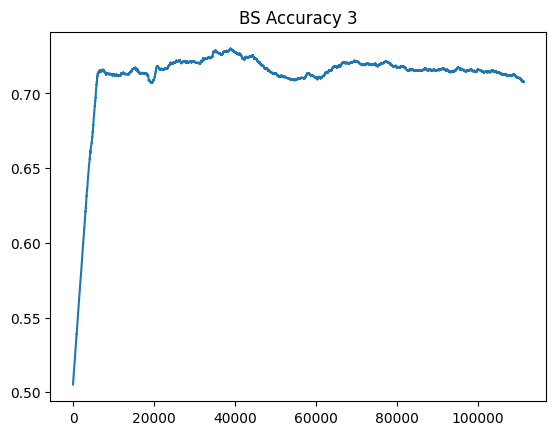

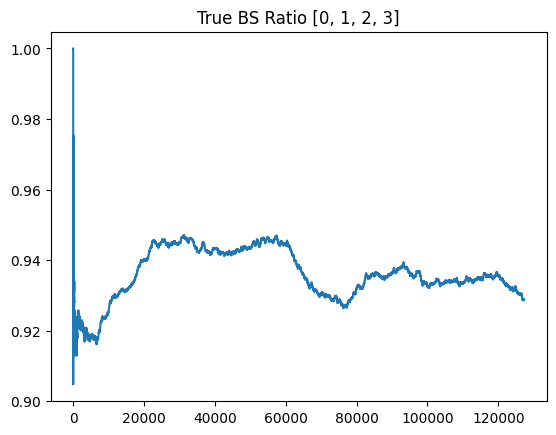

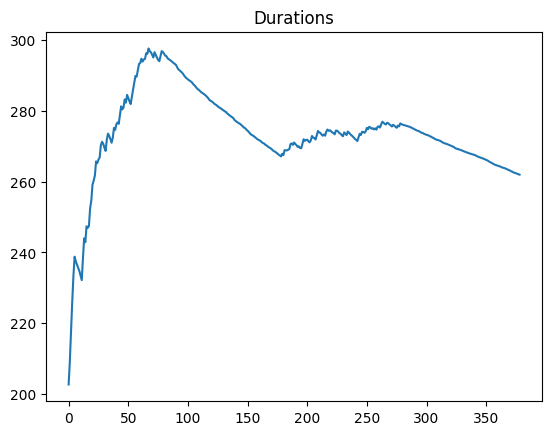

In [ ]:
NUM_EPISODES = 20000
PRINT_EVERY = 100
MURDER_EVERY = 100

print("Starting training...")

wins = [0] * 4

def render_graphs():
    plt.close("all")
    #gm.plt_avg_delta_cards(total_results, 0, n = 100)
    #gm.plt_avg_delta_cards(total_results, 1, n = 100)
    #gm.plt_avg_delta_cards(total_results, 2, n = 100)
    #gm.plt_avg_delta_cards(total_results, 3, n = 100)
    gm.plt_win_rate(total_results, 0, n = 100)
    gm.plt_win_rate(total_results, 1, n = 100)
    gm.plt_win_rate(total_results, 2, n = 100)
    gm.plt_win_rate(total_results, 3, n = 100)
    gm.plt_bs_called_accuracy_not_free(total_results, 0)
    gm.plt_bs_called_accuracy_not_free(total_results, 1)
    gm.plt_bs_called_accuracy_not_free(total_results, 2)
    gm.plt_bs_called_accuracy_not_free(total_results, 3)
    gm.plt_bs_accuracy(total_results, 0)
    gm.plt_bs_accuracy(total_results, 1)
    gm.plt_bs_accuracy(total_results, 2)
    gm.plt_bs_accuracy(total_results, 3)
    #gm.plt_bs_call_rate(total_results, 0)
    #gm.plt_bs_call_rate(total_results, 1)
    #gm.plt_bs_call_rate(total_results, 2)
    #gm.plt_bs_call_rate(total_results, 3)
    gm.plt_true_bs_ratio(total_results, player_indexes=[0,1,2,3])
    gm.plt_duration(total_results)


for episode in range(1, NUM_EPISODES + 1):
    results = env.run_game()
    env.rotate_dealer()
    total_results.append(results)
    if results.winner is not None:
        wins[results.winner] += 1
    else:
        card_sizes = [sum(hand.values()) for hand in env.player_hands]
        wins[card_sizes.index(min(card_sizes))] += 1
    # print(episode, results.winner)

    if episode % MURDER_EVERY == 0:    
        clear_output(wait=True)
        print(wins)
        to_kill = wins.index(min(wins))
        to_replace = wins.index(max(wins))
        env.players[to_kill].q_table = deepcopy(env.players[to_replace].q_table)
        env.players[to_kill].bs_agent.load_model(env.players[to_replace].bs_agent.save_model())
        wins = [0] * 4
        print("Killing player", to_kill, "and replacing with player", to_replace)

    if episode % PRINT_EVERY == 0:
        print(f"Episode: {episode}")
        render_graphs()
        plt.show()

print("Training complete!")

render_graphs()

plt.show()
